In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Credit Fraud Dataset

In [2]:
results = {
    "0": {
        "model_name": "I&S Model - Baseline",
        "test_metrics":{
            'accuracy': 0.9982,
            'precision': 0.4797,
            'recall': 0.7973,
            'f1_score': 0.5990,
            'f2_score': 0.7041,
            'auc_roc': 0.9671,
            'pr_auc': 0.4078,
        },
        "green_metrics":{
            "latency_ms": 22.7381,
            "flops_gflops": 0.0084,
            "size_model_mb": 35.9705,
            "energy_consumed_kwh": 0.0033,
            "emissions_kg_co2e": 0.0010,
            "carbon_intensity_kg_co2e_per_kwh": 0.2908
        }
    },
    1:{
        "model_name": "I&S Model - Tuned",
        "test_metrics":{
            'accuracy': 0.9985,
            'precision': 0.5439,
            'recall': 0.8378,
            'f1_score': 0.6596,
            'f2_score': 0.7561,
            'auc_roc': 0.9310,
            'pr_auc': 0.4651,
        },
        "green_metrics":{
            "latency_ms": 17.5324,
            "flops_gflops": 0.0083,
            "size_model_mb": 35.9643,
            "energy_consumed_kwh": 0.0010,
            "emissions_kg_co2e": 0.0003,
            "carbon_intensity_kg_co2e_per_kwh": 0.2908
        }
    },
    "2": {
        "model_name": "GREEN_MODEL",
        "test_metrics":{
            "accuracy": 0.9996,
            "precision": 0.9231,
            "recall": 0.8108,
            "f1_score": 0.8633,
            "f2_score": 0.8310,
            "auc_roc": 0.9409,
            "pr_auc": 0.8482
        },
        "green_metrics":{
            "latency_ms": 0.9996,
            "flops_gflops": 0.9231,
            "size_model_mb": 0.8108,
            "emissions_kg_co2e": 0.0005
        }
    },
    "3": {
        "model_name": "GREEN_MODEL + PRUNING",
        "test_metrics":{
            "accuracy": 0.9994,
            "precision": 0.8472,
            "recall": 0.8243,
            "f1_score": 0.8356,
            "f2_score": 0.8288,
            "auc_roc": 0.9692,
            "pr_auc": 0.8339
        },
        "green_metrics":{
            "latency_ms": 0.9994,
            "flops_gflops": 0.8472,
            "size_model_mb": 0.8243,
            "emissions_kg_co2e": 0.0005
        }
    }
}

In [3]:
records = []
green_records = []

for k, v in results.items():
    model_name = v.get("model_name") or v.get("model")
    test = v.get("test_metrics", {})
    green = v.get("green_metrics") or v.get("green_evaluation", {})

    records.append({
        "model": model_name,
        "accuracy": test.get("accuracy"),
        "precision": test.get("precision"),
        "recall": test.get("recall"),
        "f1_score": test.get("f1_score"),
        "auc_roc": test.get("auc_roc"),
        "pr_auc": test.get("pr_auc")
    })

    green_records.append({
        "model": model_name,
        "latency_ms": green.get("latency_ms"),
        "flops_gflops": green.get("flops_gflops"),
        "size_model_mb": green.get("size_model_mb"),
        "emissions_kg_co2e": green.get("emissions_kg_co2e")
    })

df_perf = pd.DataFrame(records)
df_green = pd.DataFrame(green_records)

sns.set(style="whitegrid", font_scale=1.1)


In [4]:
def compute_green_score(df):
    temp = df.copy()
    for col in ["latency_ms", "flops_gflops", "size_model_mb", "emissions_kg_co2e"]:
        temp[col] = (temp[col] - temp[col].min()) / (temp[col].max() - temp[col].min())
    # invert (lower = better)
    temp["green_score"] = 1 - temp[["latency_ms", "flops_gflops", "size_model_mb", "emissions_kg_co2e"]].mean(axis=1)
    return temp

df_green_score = compute_green_score(df_green)
df_summary = df_perf.merge(df_green_score[["model", "green_score"]], on="model")

## Performance metrics

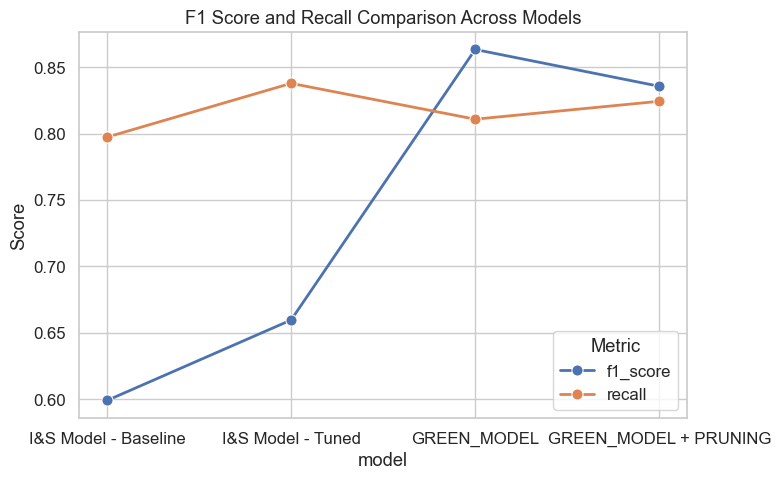

In [5]:
plt.figure(figsize=(8, 5))
sns.lineplot(data=df_perf.melt(id_vars="model", value_vars=["f1_score", "recall"],
                               var_name="Metric", value_name="Score"),
             x="model", y="Score", hue="Metric", marker="o", linewidth=2, markersize=8)
plt.title("F1 Score and Recall Comparison Across Models")
plt.ylabel("Score")
plt.tight_layout()
plt.show()

## Green AI metrics

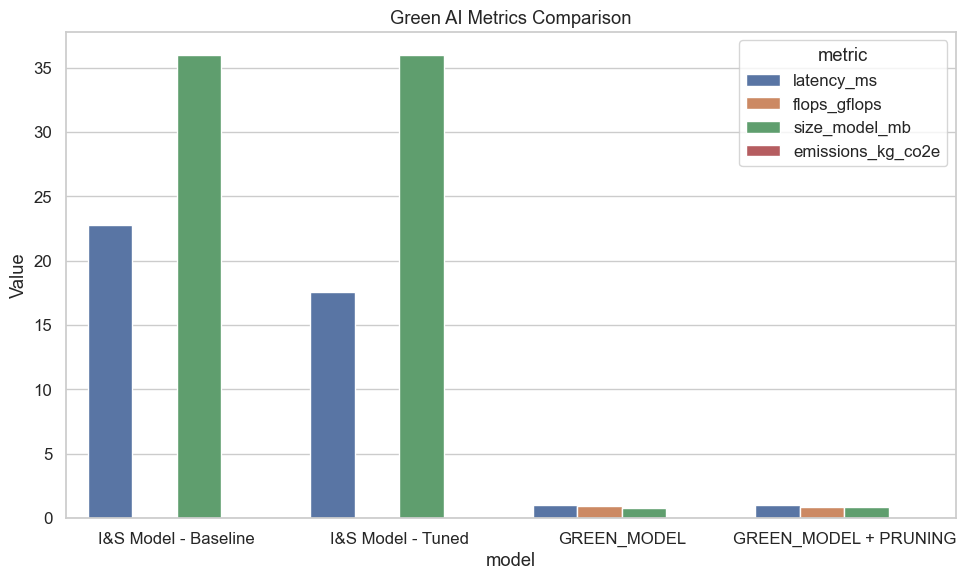

In [6]:
melted_green = df_green.melt(id_vars="model", var_name="metric", value_name="value")
plt.figure(figsize=(10, 6))
sns.barplot(data=melted_green, x="model", y="value", hue="metric", errorbar=None)
plt.title("Green AI Metrics Comparison")
plt.ylabel("Value")
plt.tight_layout()
plt.show()

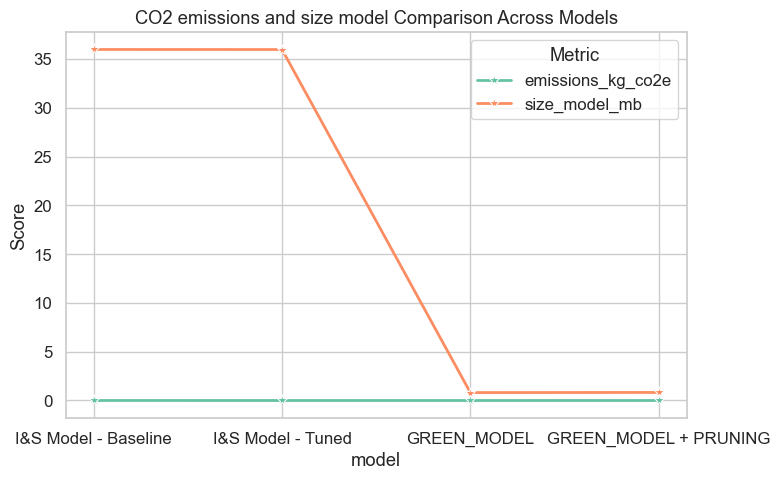

In [7]:
plt.figure(figsize=(8, 5))
sns.lineplot(data=df_green.melt(id_vars="model", value_vars=["emissions_kg_co2e", "size_model_mb"],
                               var_name="Metric", value_name="Score"),
             x="model", y="Score", hue="Metric", marker="*", linewidth=2, markersize=8, palette="Set2")
plt.title("CO2 emissions and size model Comparison Across Models")
plt.ylabel("Score")
plt.tight_layout()
plt.show()

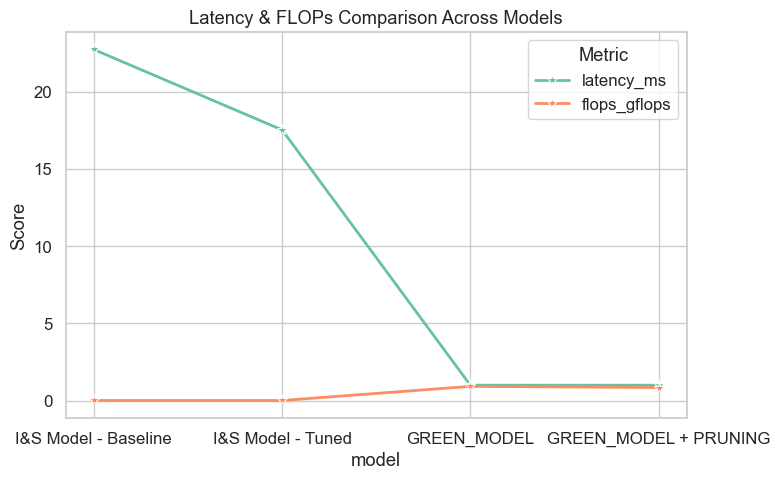

In [8]:
plt.figure(figsize=(8, 5))
sns.lineplot(data=df_green.melt(id_vars="model", value_vars=["latency_ms", "flops_gflops"],
                               var_name="Metric", value_name="Score"),
             x="model", y="Score", hue="Metric", marker="*", linewidth=2, markersize=8, palette="Set2")
plt.title("Latency & FLOPs Comparison Across Models")
plt.ylabel("Score")
plt.tight_layout()
plt.show()

## Green Score

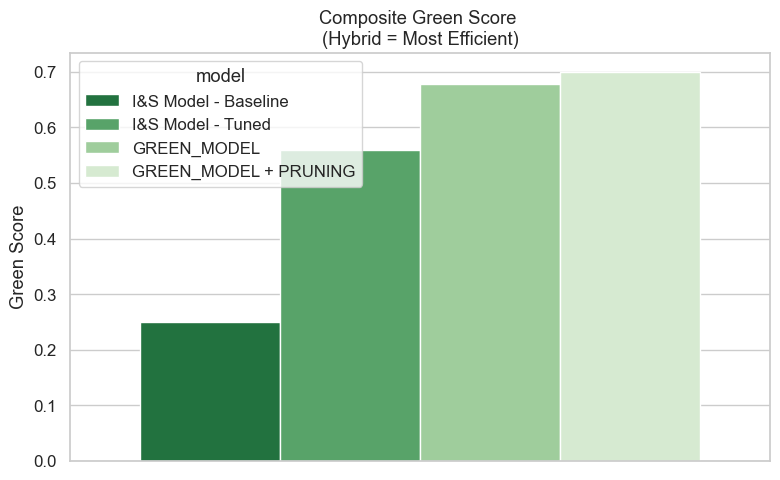

In [9]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_green_score, hue="model", y="green_score", palette="Greens_r")
plt.title("Composite Green Score \n(Hybrid = Most Efficient)")
plt.ylabel("Green Score")
plt.tight_layout()
plt.show()

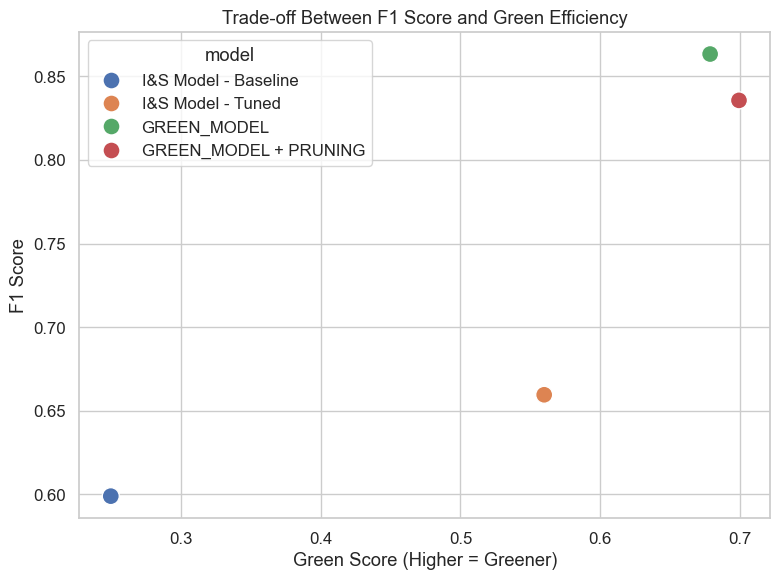

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_summary, x="green_score", y="f1_score", hue="model", s=150)
plt.title("Trade-off Between F1 Score and Green Efficiency")
plt.xlabel("Green Score (Higher = Greener)")
plt.ylabel("F1 Score")
plt.tight_layout()
plt.show()

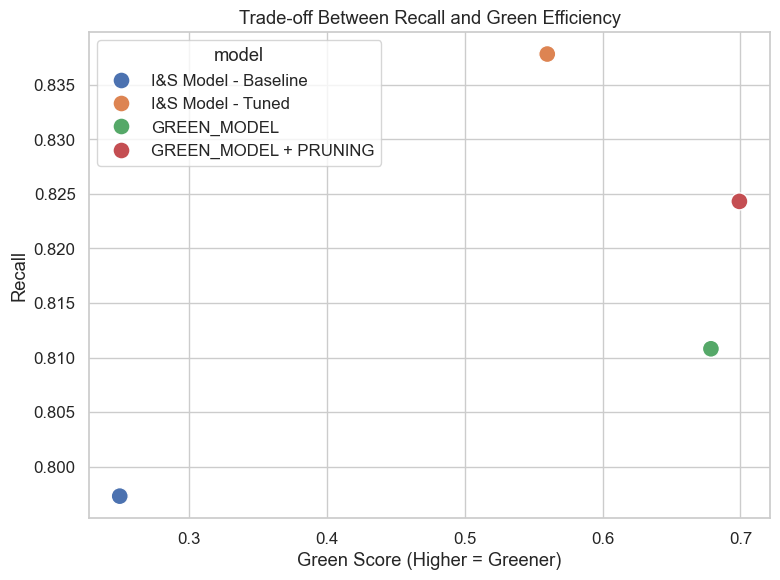

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_summary, x="green_score", y="recall", hue="model", s=150)
plt.title("Trade-off Between Recall and Green Efficiency")
plt.xlabel("Green Score (Higher = Greener)")
plt.ylabel("Recall")
plt.tight_layout()
plt.show()

## Radar - Performance & Green tradeoff

In [12]:
def radar_chart(df, title, metrics):
    labels = metrics
    num_vars = len(labels)

    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    for i, row in df.iterrows():
        values = [row[m] for m in metrics]
        values += values[:1]
        ax.plot(angles, values, label=row["model"])
        ax.fill(angles, values, alpha=0.1)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    
    plt.title(title, size=14)
    plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))
    plt.tight_layout()
    plt.show()

# Normalize for better visualization
df_green_norm = df_green.copy()
for col in df_green_norm.columns[1:]:
    df_green_norm[col] = (df_green_norm[col] - df_green_norm[col].min()) / (df_green_norm[col].max() - df_green_norm[col].min())

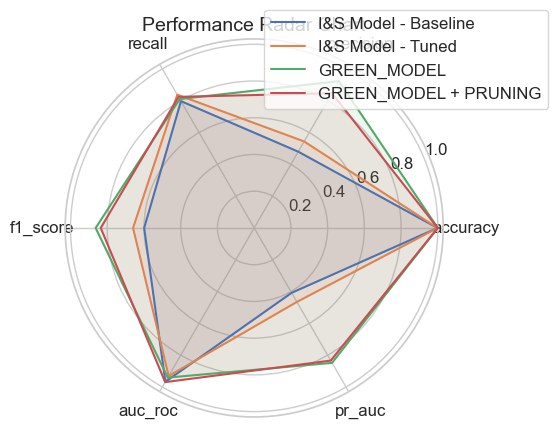

,model,accuracy,precision,recall,f1_score,auc_roc,pr_auc
0,I&S Model - Baseline,0.9982,0.4797,0.7973,0.5990,0.9671,0.4078
1,I&S Model - Tuned,0.9985,0.5439,0.8378,0.6596,0.9310,0.4651
2,GREEN_MODEL,0.9996,0.9231,0.8108,0.8633,0.9409,0.8482
3,GREEN_MODEL + PRUNING,0.9994,0.8472,0.8243,0.8356,0.9692,0.8339


In [13]:
radar_chart(df_perf, "Performance Radar Chart", ["accuracy", "precision", "recall", "f1_score", "auc_roc", "pr_auc"])
df_perf

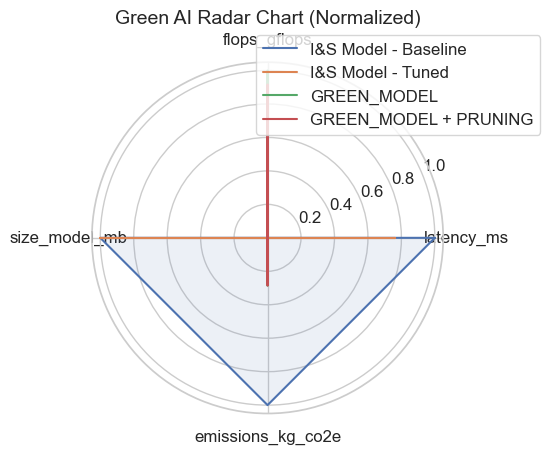

,model,latency_ms,flops_gflops,size_model_mb,emissions_kg_co2e
0,I&S Model - Baseline,1.000000,0.000109,1.000000,1.000000
1,I&S Model - Tuned,0.760533,0.000000,0.999824,0.000000
2,GREEN_MODEL,0.000009,1.000000,0.000000,0.285714
3,GREEN_MODEL + PRUNING,0.000000,0.917031,0.000384,0.285714


In [14]:
radar_chart(df_green_norm, "Green AI Radar Chart (Normalized)", ["latency_ms", "flops_gflops", "size_model_mb", "emissions_kg_co2e"])
df_green_norm

In [15]:
df_green

,model,latency_ms,flops_gflops,size_model_mb,emissions_kg_co2e
0,I&S Model - Baseline,22.7381,0.0084,35.9705,0.0010
1,I&S Model - Tuned,17.5324,0.0083,35.9643,0.0003
2,GREEN_MODEL,0.9996,0.9231,0.8108,0.0005
3,GREEN_MODEL + PRUNING,0.9994,0.8472,0.8243,0.0005
